# # 🧩 Notebook 06: Time Series Line Plots in Seaborn

In [1]:
# 📦 Setup & Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# ✅ Setup path to use utils

PROJECT_ROOT = Path.cwd().parent
UTILS_DIR = PROJECT_ROOT / "utils"
if str(UTILS_DIR) not in sys.path:
    sys.path.insert(0, str(UTILS_DIR))

from plot_utils import (
    apply_theme, 
    stylize_plot, 
    save_fig, 
    format_date_axis
)

apply_theme()

In [2]:
# 🔹 Load Dataset

df = pd.read_csv("../datasets/web_traffic.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)
df.head()

,Sessions,Page Views,Bounce Rate (%)
Date,,,
2024-01-01,152,256,39.61
2024-01-02,149,246,43.47
2024-01-03,167,203,46.35
2024-01-04,175,213,34.65
2024-01-05,144,200,68.52


✅ Plot saved to ../exports/06_timeseries/sessions_lineplot.png


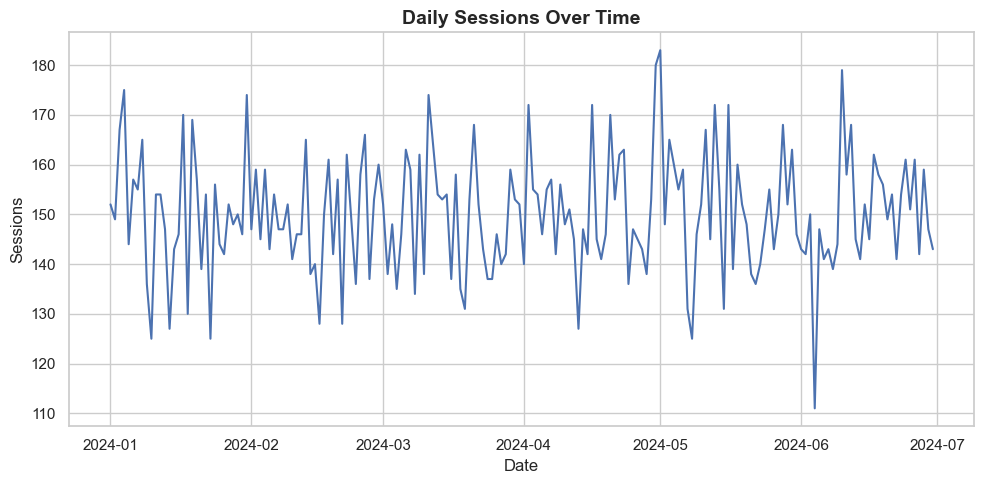

In [3]:
# 📈 Daily Sessions Trend

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x=df.index, y="Sessions")

stylize_plot("Daily Sessions Over Time", "Date", "Sessions")
save_fig("../exports/06_timeseries/sessions_lineplot.png")
plt.show()

✅ Plot saved to ../exports/06_timeseries/sessions_rolling_avg.png


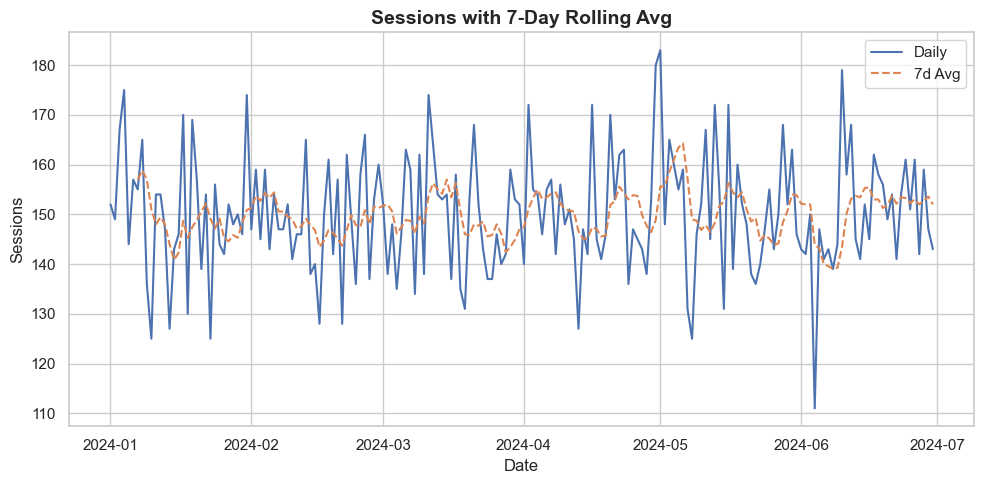

In [4]:
# 📈 7-Day Rolling Average

df["Sessions (7d Avg)"] = df["Sessions"].rolling(window=7).mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x=df.index, y="Sessions", label="Daily")
sns.lineplot(data=df, x=df.index, y="Sessions (7d Avg)", label="7d Avg", linestyle="--")

stylize_plot("Sessions with 7-Day Rolling Avg", "Date", "Sessions")
save_fig("../exports/06_timeseries/sessions_rolling_avg.png")
plt.show()

✅ Plot saved to ../exports/06_timeseries/sessions_vs_pageviews.png


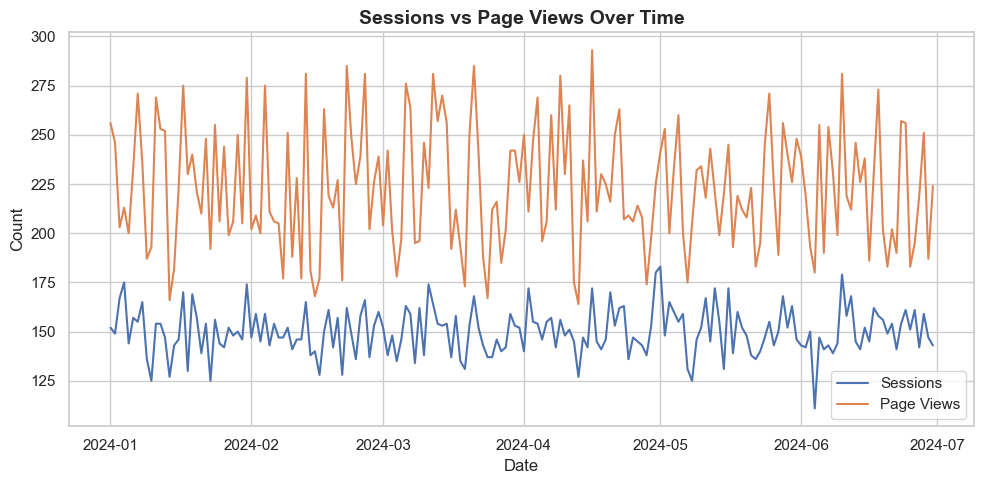

In [5]:
# 📈 Page Views vs Sessions (Dual Line)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x=df.index, y="Sessions", label="Sessions")
sns.lineplot(data=df, x=df.index, y="Page Views", label="Page Views")

stylize_plot("Sessions vs Page Views Over Time", "Date", "Count")
save_fig("../exports/06_timeseries/sessions_vs_pageviews.png")
plt.show()

✅ Plot saved to ../exports/06_timeseries/sessions_lineplot.png


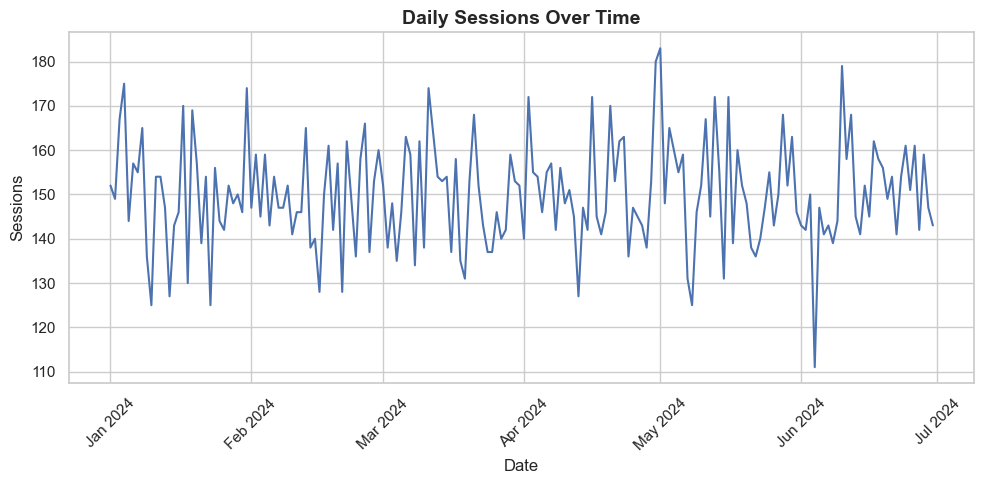

In [6]:
# 📈 Time Series Lineplot with Formatted Date Axis

from plot_utils import format_date_axis

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x=df.index, y="Sessions")

stylize_plot("Daily Sessions Over Time", "Date", "Sessions")
format_date_axis(date_format="%b %Y")
save_fig("../exports/06_timeseries/sessions_lineplot.png")
plt.show()

# ✅ Summary

In this notebook, we:

- Created time series line plots using `sns.lineplot()`
- Parsed and indexed date fields
- Visualized raw trends and rolling averages
- Compared multiple time series on the same plot
- Saved all visuals into a dedicated export folder